## Анализ продаж компьютерных игр: выявление закономерностей

Данный проект состоит из:
- решения задач и тестов по Python, pandas и статистике
- решения задач на составление SQL-запросов

В данном проекте используются следущие новыки:
 - A/B-тестирование,
 - Pandas,
 - PostgreSQL,
 - Python,
 - SQL,
 - описательная статистика,
 - проверка статистических гипотез.

**План:**

Для начала изучим полученный датафрейм, познакомимся с данными, и совершим предобработку данных. Далее проведем исследовательский анализ для выявления критериев успешности видеоигр и закрепим статистическим тестом.

**Оглавление:**
- [Знакомство c данными](#Знакомство-c-данными)
- [Предобработка данных](#Предобработка-данных)
- [Анализ](#Анализ)
-- [Общие продажи и популярные платформы](#Общие-продажи-и-популярные-платформы)
-- [Актуальный период продаж](#Актуальный-период-продаж)
-- [Портрет игроков](#Портрет-игроков)
- [Статистический тест](#Статистический-тест)
- [Общие выводы](#Общие-выводы)

## Знакомство с данными

In [1]:
# импортируем библиотеки
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
# настройки отображения

# формат отображения
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# предупреждения
warnings.filterwarnings('ignore')

# стиль графиков и шрифтов
plt.style.use("seaborn-whitegrid")
class font:
        BOLD = "\033[1m"
        END = "\033[0m"
color = '#4884af'
palette = 'Blues_r'

In [4]:
# выводим основную информацию о датасете
display(data.info(), data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5740,Foto Frenzy: Spot The Diffrence,DS,2009.00,Puzzle,0.29,0.00,0.00,0.02,NaN,NaN,NaN
2851,The Witcher 3: Wild Hunt,PC,2015.00,Role-Playing,0.21,0.46,0.00,0.05,93.00,9.3,M
12144,Beat City,DS,2010.00,Misc,0.06,0.00,0.00,0.00,70.00,tbd,E
13660,Maken Shao: Demon Sword,PS2,2001.00,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13566,Disney's Meet the Robinsons,GC,2007.00,Action,0.03,0.01,0.00,0.00,68.00,tbd,E10+
3227,NBA ShootOut '97,PS,1997.00,Sports,0.35,0.24,0.00,0.04,NaN,NaN,NaN
14176,Boboboubo Boubobo: Ougi 87.5 Bakuretsu Hanage ...,GBA,2002.00,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
12973,Fatal Fury: Wild Ambition,PS,1999.00,Fighting,0.03,0.02,0.00,0.00,NaN,NaN,NaN
9908,Petz Puppyz & Kittenz,DS,2011.00,Misc,0.11,0.00,0.00,0.01,NaN,NaN,NaN
13736,12Riven: The Psi-Climinal of Integral,PS2,2008.00,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Представленный датафрейм состоит из 11 столбцов на 16715 строк и содержит информацию об играх и их продажах, а также оценки игроков и критиков. Однако при проверке качества данных были обнаружены пропущенные значения и некорректные типы данных в некоторых столбцах, которые необходимо исправить.

---

## Предобработка данных

Для начала необходимо исправить существующие проблемы, такие как некорректные названия столбцов и пропущенные значения. Мы также должны проверить и исправить типы данных, чтобы избежать ошибок при анализе данных.

**Названия столбцов:**

Скорректируем  название столбцов.

In [5]:
# выводим название столбцов
list(data.columns)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [6]:
# приводим названия к нижнему регистру
data.columns = data.columns.str.lower()
# проверка
list(data.columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

**Пропуски:**

In [7]:
# выводим количество пропусков в % соотношении
pd.DataFrame(
        data.isna().mean() * 100
).style.background_gradient("coolwarm")

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


Доля пропущенных значений для каждого столбца в дата фрейме показывает, что в 6 столбцах из 11 есть пропуски. Суммарная доля пропущенных значений в столбцах, содержащих имя, жанр, год релиза проекта, составляет менее 2%. Удаление такого количества пропусков не повлияет на результаты дальнейшего анализа. Рейтинг видеоигр содержит качественные значения, поэтому можно заполнить пропуски пометкой “неизвестно”.
В столбцах, содержащие рейтинги, оценки игроков и критиков, пропуски составляют более 40%. Оценки записаны в дискретно-числовом формате, поэтому качественное заполнение или удаление пропусков в данном случае невозможно. Лучше всего поставить нулевые оценки, которые обычно не проставляются, для тех игровых проектов, у которых они отсутствуют, но сначала необходимо проверить, присутствуют ли нулевые оценки в датафрейме.

In [8]:
# проверим минимальные значения
print(
    f"Минимальная оценка критиков: {data['critic_score'].min()}",
    f"Минимальная оценка игроков: {data[data['user_score'] >= '0']['user_score'].min()}", sep='\n'
    )

Минимальная оценка критиков: 13.0
Минимальная оценка игроков: 0


Теория частично подтвердилась: минимальная оценка, данная критиками, составила 13 баллов из 100. В то же время, минимальная оценка, поставленная игроками, составила всего 0 баллов. Теперь рассмотрим игры, которые получили такие оценки.

In [9]:
# находим все игры с нулевой оценкой от игроков
data.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.00,Adventure,0.66,0.00,0.00,0.06,NaN,0,E


Игра с такой нулевой оценкой оказалась единственной и, поскольку оценка от критиков отсутствовала, можно было бы предположить, что эта оценка фиктивная.

По результату проверки теории пропуски в столбцах, содержащие оценки, заполняем нулями.

In [10]:
# заполняем пропуски
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna('0')
data['rating'] = data['rating'].fillna('unknown')

# удаляем пропуски
data = (
    data
    .dropna(subset=['year_of_release'])
    .dropna(subset=['name'])
    .dropna(subset=['genre'])
    )

# проверка
pd.DataFrame(
        data.isna().mean() * 100
).style.background_gradient("coolwarm")

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Пропарка подтверждает, что после операций по заполнению и удалению пропусков их в датасете не осталось.

**Типы данных:**

Более детально рассмотрим типы данных во всех столбцах датафрейма и их уникальные значения для последующей корректировки.

In [11]:
# выводим информацию о типах данных и уникальные значения столбцов одним блоком
for col in data.columns:
    print(
        font.BOLD,
        f'column: {col}',
        f'type: {data[col].dtypes}',
        font.END,
        (data[col].unique())[:30],
         " ",
        sep="\n"
          )


column: name
type: object

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort'
 'Pokemon Red/Pokemon Blue' 'Tetris' 'New Super Mario Bros.' 'Wii Play'
 'New Super Mario Bros. Wii' 'Duck Hunt' 'Nintendogs' 'Mario Kart DS'
 'Pokemon Gold/Pokemon Silver' 'Wii Fit' 'Kinect Adventures!'
 'Wii Fit Plus' 'Grand Theft Auto V' 'Grand Theft Auto: San Andreas'
 'Super Mario World' 'Brain Age: Train Your Brain in Minutes a Day'
 'Pokemon Diamond/Pokemon Pearl' 'Super Mario Land' 'Super Mario Bros. 3'
 'Grand Theft Auto: Vice City' 'Pokemon Ruby/Pokemon Sapphire'
 'Brain Age 2: More Training in Minutes a Day'
 'Pokemon Black/Pokemon White' 'Gran Turismo 3: A-Spec'
 'Call of Duty: Modern Warfare 3'
 'Pokémon Yellow: Special Pikachu Edition']
 

column: platform
type: object

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG']
 

column: year_of_release
t

Перейдём к корректировки записи значений по столбцам:

**Столбцы с качественными данными**

**`name`**

В названиях видеоигр присутствуют лишние знаки препинания и дублирование информации в скобках. Скорректируем названия.

In [12]:
# приводим к нижнему регистру и удаляем элементы из названий
data['name'] = (
    data['name']
    .apply(lambda x: re.sub(r'(\/.*\/)|(\(.*\))|(\".*\")', "", x))
    .str.lower()
    .str.replace(':', '')
    .str.replace('.', '')
    .str.replace('?', '')
    .str.replace("'", "")
    .str.strip()
    )
# проверка
list(data['name'].sample(20))

['daito giken koushiki pachi-slot simulator 24 - twenty-four',
 'mysims skyheroes',
 'sonny with a chance',
 'shadowgate 64 trials of the four towers',
 'nascar 2001',
 'motogp 09/10',
 'earth defense force 2025',
 'retro atari classics',
 'test drive',
 'the land before time great valley racing adventure',
 'hi hi puffy amiyumi the genie & the amp',
 'unreal tournament',
 'midnight magic',
 'backyard nfl football',
 'power stone collection',
 'atv quad power racing',
 'monster rancher 2',
 'my baby girl',
 'star wars the clone wars republic heroes',
 'the punisher']

**`'platform'`, `'genre'`, `'rating'`**

Названия игровых платформ, жанров и рейтинг игр приводим к общему нижнему регистру.

In [13]:
# цикл повторяет действия для следующих столбцов
for col in ['platform', 'genre', 'rating']:
  # приводим к нижнему регистру
  data[col] = data[col].str.lower()
  # проверка
  print(font.BOLD,
        col,
        font.END,
        data[col].sort_values().unique(),
        " ",
        sep="\n")


platform

['2600' '3do' '3ds' 'dc' 'ds' 'gb' 'gba' 'gc' 'gen' 'gg' 'n64' 'nes' 'ng'
 'pc' 'pcfx' 'ps' 'ps2' 'ps3' 'ps4' 'psp' 'psv' 'sat' 'scd' 'snes' 'tg16'
 'wii' 'wiiu' 'ws' 'x360' 'xb' 'xone']
 

genre

['action' 'adventure' 'fighting' 'misc' 'platform' 'puzzle' 'racing'
 'role-playing' 'shooter' 'simulation' 'sports' 'strategy']
 

rating

['ao' 'e' 'e10+' 'ec' 'k-a' 'm' 'rp' 't' 'unknown']
 


**`year_of_release`**

Скорректируем формат отображения год релизов.

In [14]:
# меняем тип данных
data['year_of_release'] = data['year_of_release'].astype('int')
# проверка
data['year_of_release'].sample(10)

13631    2013
11963    2015
7438     2010
16459    2014
4839     2008
6967     2008
442      2005
8044     2002
14695    2016
4753     2013
Name: year_of_release, dtype: int64

**`rating`**

В описании к данным указано, что рейтинги видеоигр присваивались по системе ESRB. Ниже представлены аббревиатуры этой системы рейтингов:

Рейтинг | Расшифровка | Описание
:---: | :---: | :---:
**EC** | Early Childhood | Для детей младшего возраста
**E** | Everyone | Для всех
**E10+** | Everyone 10+ | Для всех, кому больше 10
**T** | Teen | Подросткам
**M** | Mature | Взрослым
**AO** | Adults Only | Только для взрослых
**RP** | Rating Pending | Рейтинг ожидается

В столбце `rating` также присутсвует рейтинг K-A (Kids to Adults) - первоначальный вариант рейтинга E, поэтому стоит его переименовать.

In [15]:
# переименовываем значение
data['rating'] = data['rating'].str.replace('k-a', 'e')
# проверка
list(data['rating'].unique())

['e', 'unknown', 'm', 't', 'e10+', 'ao', 'ec', 'rp']

**Столбцы с количественными данными**

Количество продаж в разных регионах - непрерывная величина, поэтому стоить проверить столбцы содержащую информацию о продажах на выбросы с помощью диаграмм размаха.

,min,max,50%,mean,std
na_sales,0.00,41.36,0.08,0.26,0.82
eu_sales,0.00,28.96,0.02,0.15,0.51
jp_sales,0.00,10.22,0.00,0.08,0.31
other_sales,0.00,10.57,0.01,0.05,0.19


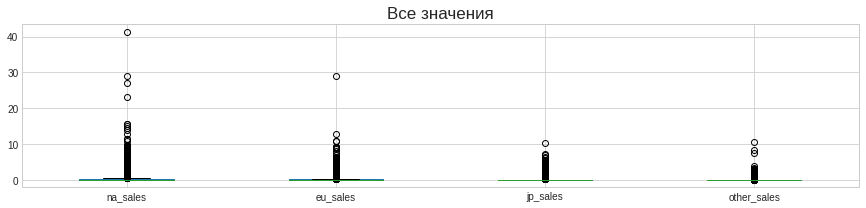

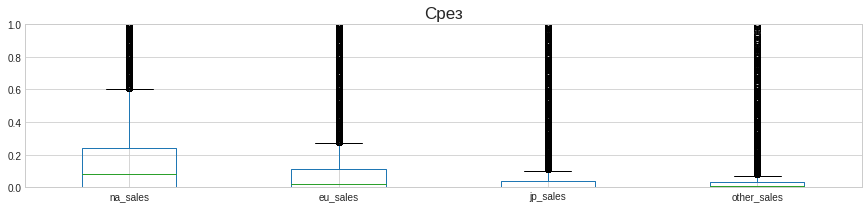

In [16]:
# формируем срез по непрерывным количественным данным в следующих столбцах
sales = data[[
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales'
    ]]
# выводим описание данных
display(
    round(sales
          .describe()
          .T[[
              'min',
              'max',
              '50%',
              'mean',
              'std'
              ]], 2
          )
    )
# строим диаграмму размаха
plt.figure(figsize=(15, 3))
sales.boxplot()
plt.title("Все значения", size=17)
# изменяем масштаб
plt.figure(figsize=(15, 3))
sales.boxplot()
plt.title("Срез", size=17)
plt.ylim(0,1)

plt.show()

В представленных данных есть выбросы, которые оказывают значительное влияние на среднее значение. Поэтому для дальнейшего анализа необходимо использовать медианное значение вместо среднего значения.

**`critic_score`**

Для удобного и корректного отображения оценок критиков переведём значения в другой формат.

In [17]:
# меняем тип данных на целые числа
data['critic_score'] = data['critic_score'].astype('int')
# проверка
print(data['critic_score'].sort_values().unique())

[ 0 13 17 19 20 21 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 95 96 97 98]


**`user_score`**

В данном случае ситуация аналогичная. Сначала нужно заменить значение “tbd” на “0”, которое мы уже использовали для заполнения пропусков. Затем привести типы и форматы данных к единому виду, как и в случае с оценками критиков.

In [18]:
# корректируем формат и тип данных
data['user_score'] = (data['user_score']
                      # презаписываем tbd на 0
                      .str.replace('tbd', '0')
                      # корректируем формат записи
                      .astype('float64')
                      .apply(lambda x: x * 10)
                      # приводим значения к целым числам
                      .astype('int'))
# проверка
print(data['user_score'].sort_values().unique())

[ 0  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97]


Далее рассмотрим распределение значений в данных столбцах **без нулевых значений.**

,min,max,50%,mean,std
user_score,5.00,96.00,75.00,71.84,14.40
critic_score,13.00,98.00,72.00,70.26,13.86


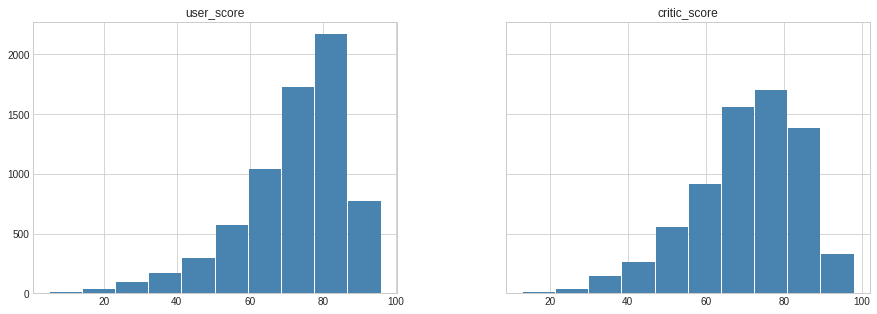

In [19]:
# формируем срез по дискретным количественным данным в следующих столбцах
score = data.query('user_score > 0 and critic_score > 0')[['user_score', 'critic_score']]

# выводим описание данных
display(
    round(score
          .describe()
          .T[[
              'min',
              'max',
              '50%',
              'mean',
              'std'
              ]], 2
          )
    )
# строим гистограммы
score.hist(
    bins=10,
    rwidth=.97,
    figsize=(15,5),
    sharey=True,
    color=color
    )
plt.show()

Оценки в представленных данных имеют нормальное распределение, смещенное влево. Оценки игроков и критиков немного отличаются друг от друга, но игроки, как правило, дают более высокие оценки.

**Дубликаты:**

In [20]:
print(
    f'Количество явных дубликатов в датафрейме: {data.duplicated().sum()}',
    f'Количество дубликатов по столбцу name: {data["name"].duplicated().sum()}',
    sep='\n'
    )

Количество явных дубликатов в датафрейме: 0
Количество дубликатов по столбцу name: 5191


Проверка на дубликаты по названиям показала, что около 30% названий проектов - дубликаты. Стоит рассмотреть их детальнее.

In [21]:
# создаём отдельный столбец, является ли название дубликатом
data['name_dup'] = data["name"].duplicated()

# выводим информация на проверку
(
    data
    .query('name_dup == True')[['name', 'platform']]
    .sort_values(by='name')
    .head(30)
 )

,name,platform
3120,007 quantum of solace,wii
4475,007 quantum of solace,ps2
1785,007 quantum of solace,ps3
9507,007 quantum of solace,ds
14658,007 quantum of solace,pc
2243,007 the world is not enough,ps
15656,11eyes crossover,psp
10076,18 wheeler american pro trucker,gc
12283,187 ride or die,xb
9966,2 in 1 combo pack sonic heroes / super monkey ...,x360


Дублирование названий происходит из-за выпуска одной и той же игры на разных платформах. Игра необязательно должна быть эксклюзивом для одной платформы, а может выходить на нескольких из них.

In [22]:
# находим дубликаты по нескольким столбцам и записываем их
dup = data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]
# выводим дубликаты по нескольким столбцам и их количество
display(
    dup.sort_values(by='name', ascending=False).head(10),
    f'Размеры dup: {dup.query("name_dup == True").shape}'
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_dup
6317,yu-gi-oh! the sacred cards,gba,2002,role-playing,0.00,0.00,0.26,0.01,0,0,unknown,True
1747,yu-gi-oh! the sacred cards,gba,2002,role-playing,0.84,0.27,0.00,0.05,0,0,unknown,True
1507,yu-gi-oh! the sacred cards,gba,2002,role-playing,0.94,0.35,0.00,0.02,0,0,unknown,False
4731,yu-gi-oh! the eternal duelist soul,gba,2001,misc,0.00,0.00,0.40,0.01,0,0,unknown,True
815,yu-gi-oh! the eternal duelist soul,gba,2001,strategy,1.64,0.36,0.00,0.07,0,0,unknown,False
9553,yu-gi-oh! nightmare troubadour,ds,2005,action,0.00,0.03,0.10,0.00,0,0,unknown,True
8935,yu-gi-oh! nightmare troubadour,ds,2005,action,0.15,0.00,0.00,0.00,0,0,unknown,False
15654,yu-gi-oh! gx the beginning of destiny,ps2,2007,strategy,0.00,0.00,0.02,0.00,0,0,unknown,True
10942,yu-gi-oh! gx the beginning of destiny,ps2,2007,strategy,0.05,0.04,0.00,0.01,0,0,unknown,False
13202,yu-gi-oh! gx spirit caller,ds,2006,misc,0.00,0.00,0.05,0.00,0,0,unknown,True


'Размеры dup: (127, 12)'

При проверке датафрейма на наличие неявных дубликатов по названию проекта, платформе и дате выпуска мы обнаружили, что такие дубликаты действительно есть, 127 дублированных строк. Они возникли из-за того, что для определённых регионов продажи записывались отдельно, что привело к дублированию проектов. Чаще всего продажи отдельно записывались для японского региона. Однако также встречаются дубликаты продаж в европейском регионе и в других регионах.

Корректно дополнить значения по продажам достаточно трудно, поэтому мы их удалим из датафрейма. Удаление сильно не повлияет на последующий анализ, так как доля удалённых дубликатов составит меньше одного процента. 

In [23]:
# проверка перед удалением
print(f'Размеры data до удаления: {data.shape}')

# удаляем дубликаты по нескольким столбцам
data = data.drop_duplicates(subset=['name', 'platform','year_of_release'])

# проверка
print(f'Размеры data после удаления: {data.shape}'),
display(data[data[['name', 'platform','year_of_release']].duplicated(keep=False)])

Размеры data до удаления: (16444, 12)
Размеры data после удаления: (16334, 12)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_dup


Последним шагом в подготовке данных для дальнейшего анализа является рассмотрение продаж видеоигр и вычисление суммарных продаж во всех регионах.

In [24]:
# проверим срез данных, которые будем суммировать
data[[
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales'
    ]].sample(10)

,na_sales,eu_sales,jp_sales,other_sales
2777,0.67,0.00,0.00,0.07
5571,0.30,0.00,0.00,0.02
10899,0.06,0.02,0.00,0.02
281,2.04,0.48,1.57,0.07
9812,0.10,0.01,0.00,0.01
3730,0.31,0.18,0.00,0.05
13192,0.00,0.05,0.00,0.00
5854,0.25,0.00,0.00,0.06
3317,0.43,0.16,0.00,0.01
10796,0.08,0.01,0.00,0.01


In [25]:
# создаём новый столбец с суммарными прожами
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# проверка
data[[
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales',
    'total_sales'
    ]].sample(10)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
14871,0.02,0.00,0.00,0.01,0.03
13834,0.00,0.00,0.04,0.00,0.04
3048,0.51,0.10,0.00,0.06,0.67
6091,0.20,0.08,0.00,0.01,0.29
7566,0.00,0.00,0.20,0.00,0.20
6742,0.17,0.04,0.00,0.04,0.25
11152,0.08,0.00,0.00,0.01,0.09
768,0.59,1.05,0.07,0.44,2.15
7316,0.13,0.03,0.04,0.01,0.21
1739,0.68,0.25,0.21,0.02,1.16


После проведения предварительной обработки данных мы исправили названия столбцов, убрали пропущенные значения и привели форматы данных к одному типу. Кроме того, мы удалили дубликаты записей и добавили новый столбец, который будет содержать суммарные продажи по всем регионам. Теперь мы готовы к дальнейшему анализу данных.

---

## Анализ

### Общие продажи и популярные платформы

Для начала рассмотрим, сколько игр выпускалось в разные годы.

,year_of_release,games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


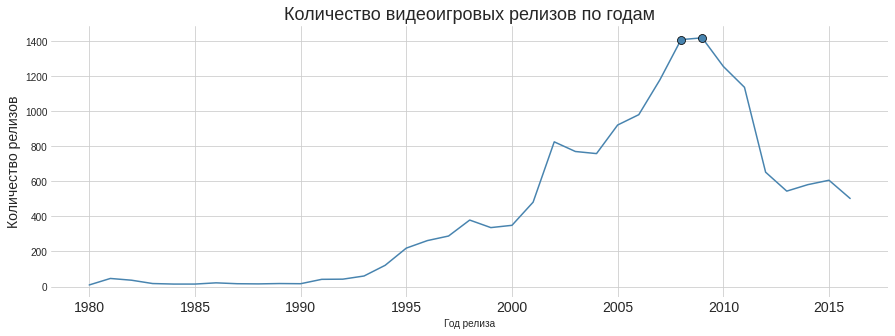

In [26]:
# выпуск игр в разные годы
release_per_year = (
    data
    .groupby('year_of_release')
    .agg(games=('name','count'))
    .reset_index()
    )
# вывод таблицы
display(release_per_year.head())

# строим график
plt.figure(figsize = (15, 5))
sns.lineplot(
    data=release_per_year,
    x="year_of_release",
    y="games",
    color=color,
    marker = 'o',
    markersize=8,
    markeredgecolor='black',
    markevery=[28,29]
    )
# оформляем
plt.title('Количество видеоигровых релизов по годам', size=18)
plt.xlabel('Год релиза')
plt.xticks(size=14)
plt.ylabel('Количество релизов', size=14)
sns.despine(left=True, bottom=True)
plt.show()

В ходе анализа динамики продаж видеоигр было выявлено, что пик продаж пришелся на период с 2008 по 2009 год. Однако в промежутке с 1985 года по 2008 наблюдалось неравномерное развитие с периодическими спадами, а с 2009 года продажи начали снижаться до окончания наблюдений. Для анализа успешности современных видеоигр стоит рассматривать непосредственно современные игры. Показатели из 80-х и 90-х годов в данном случае не подойдут.

Далее рассмотрим количество и динамику продаж по популярным платформам.

In [27]:
def share(df):
  '''
  Функция создаёт отдельный столбце с подсчётом доли от общих продаж
  '''
  total_sum = df['total_sales'].sum()
  df['share, %'] = df['total_sales'] / total_sum
  return df

,platform,total_sales,"share, %"
0,ps2,1225.12,0.14
1,x360,960.39,0.11
2,ps3,931.29,0.11
3,wii,890.05,0.10
4,ds,799.01,0.09


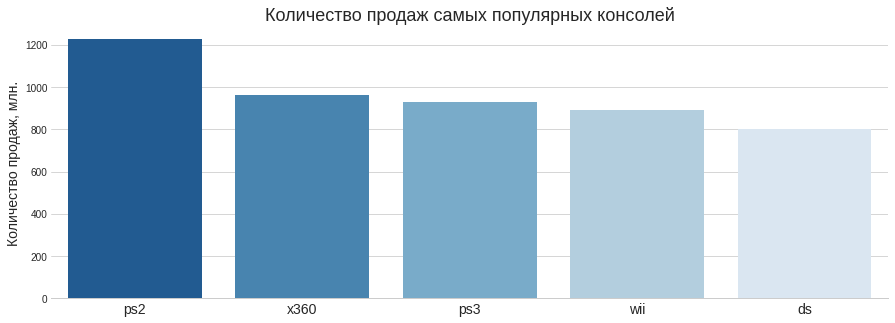

In [28]:
# топ 5 платформ по продажам
top_platform = (
    data
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
# добавляем  столбец с долями от общих продаж и выводим 5 платформ
top_platform = share(top_platform).head()

# вывод таблицы
display(top_platform)

# строим график
plt.figure(figsize=(15,5))
ax = sns.barplot(
    data=top_platform,
    x='platform',
    y='total_sales',
    palette=palette)
# оформляем
plt.title('Количество продаж самых популярных консолей', size=18)
plt.xlabel('')
plt.ylabel('Количество продаж, млн.', size=14)
plt.xticks(size=14)
#ax.bar_label(ax.containers[0], labels=round(top_platform['total_sales'], 2), size=13)
sns.despine(left=True)
plt.show()

По результату подсчётов в список топ-5 видеоигровых платформ по количеству продаж входят:
- Sony PlayStation 2
- Microsoft Xbox 360
- Sony PlayStation 3
- Nintendo Wii
- Nintendo DS

Далее рассмотрим  динамику продаж видеоигр только по этим платформам.

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
ds,NaN,NaN,NaN,NaN,16.96,129.50,119.20,146.50,144.51,118.57,85.02,26.18,11.01,1.54,NaN,NaN,NaN
ps2,39.17,166.43,205.34,183.18,210.47,156.90,102.26,75.81,53.25,26.22,5.64,0.45,NaN,NaN,NaN,NaN,NaN
ps3,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.15,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60
wii,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.70,170.26,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
x360,NaN,NaN,NaN,NaN,NaN,8.25,51.47,95.41,135.26,119.59,170.03,143.84,99.74,88.58,34.74,11.96,1.52


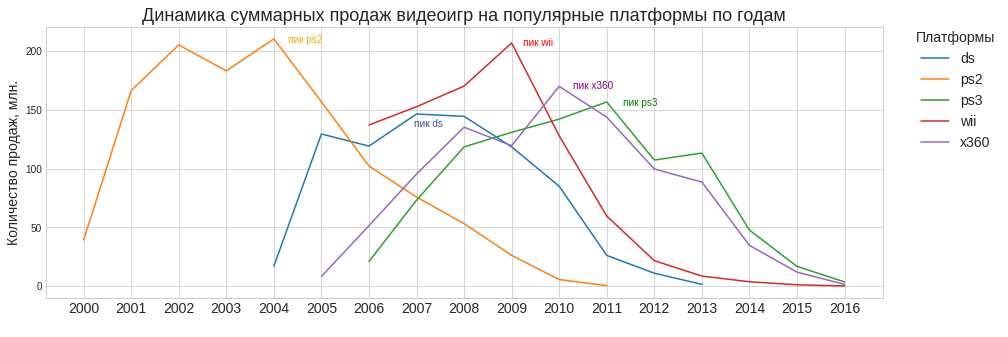

In [29]:
# создаём список топ-5 платформ
top_platform_list = top_platform['platform']

# создаём сводную таблицу по динамике продаж
top_sales = (
    data
    .query('platform in @top_platform_list')
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum')[1:]
    )

# выводим таблицу
display(top_sales.T)

# строим график
ax = top_sales.plot(figsize=(15, 5))
# оформляем
plt.title('Динамика суммарных продаж видеоигр на популярные платформы по годам', size=18)
plt.xlabel(' ')
x_ticks = top_sales.index
x_labels = top_sales.index
plt.xticks(ticks=x_ticks, labels=x_labels, size=14)
plt.ylabel('Количество продаж, млн.', size=14)
plt.legend(title= 'Платформы', title_fontsize = 14, prop = {'size' : 14}, bbox_to_anchor= (1.15, 1.03))
plt.text(0.29, 0.94, 'пик ps2', c='orange', transform=ax.transAxes)
plt.text(0.57, 0.93, 'пик wii', c='red', transform=ax.transAxes)
plt.text(0.69, 0.71, 'пик ps3', c='green', transform=ax.transAxes)
plt.text(0.63, 0.77, 'пик х360', c='purple', transform=ax.transAxes)
plt.text(0.44, 0.63, 'пик ds', c='#2f52a4', transform=ax.transAxes)
plt.show()

На графике динамики продаж популярных платформ по годам мы можем наблюдать взлёты и падения видеоигровых платформ. Вот факты по таким платформам:
- На Sony PlayStation 2 игры продавалась с 2000 по 2011 года. Резкий рост продаж. Два пика продаж - 2002 и 2004 года. Далее равномерный спад.
- На Nintendo DS игры продавалась с 2004 по 2013 года. Резкий рост продаж. Пик продаж - 2007 с сохранением похожих показателей на 2008. Далее плавный спад по 2010 год.
- На Microsoft Xbox 360 видеоигры продавались c 2005 по 2016 года. Стабильный рост продаж с небольшим падением в 2009 году. Пик продаж - 2010 год. Далее плавный спад.
- На Nintendo Wii игры продавалась с 2009 по 2016 года. Самое большое количество проданных игр в первый год среди всех консолей. Пик продаж - 2009 год. Далее равномерный спад.
- На Sony PlayStation 3 игры продавались с 2006 по 2016 года. С годами наблюдается плавный рост продаж с пиков в 2011 году, далее каскадный спад.

Рынок видеоигр характеризуется цикличностью выпуска новых платформ. Обычно одна компания не выпускает более одной консоли одновременно. Кроме того, различные компании конкурируют в похожих продуктах, что приводит к тому, что новые консоли часто выходят одновременно с продуктами конкурентов. На графике можно заметить плавное “смену” консоли PlayStation 2 к PlayStation 3 и запуск трех новых консолей - PlayStation 3, Xbox и Wii - почти одновременно.

### Актуальный период продаж

Для определения актуального периода подсчитаем среднее количество лет продаж видеоигр на популярных платформах.  

In [30]:
# временные промежутки продаж популярных консолей
sales_duration = (2011 - 2000), (2013-2004), (2016-2005), (2016-2009), (2016-2006)

print(
    f'Средний срок продолжительности продаж видеоигр на популярных платформах: {sum(sales_duration) / len(sales_duration)} лет'
      )

Средний срок продолжительности продаж видеоигр на популярных платформах: 9.6 лет


Средний срок цикла поколений консолей составляет 9.6 лет. Пик продаж чаще всего приходится на середину цикла. Определим последние 5 лет как актуальный период.

In [31]:
# определяем акутальный переод
current_period = 4

# создаём срез данных по актуальному переоду
slice = data.query(f"year_of_release > {data['year_of_release'].max()} - {current_period}")
# проверка
print(slice['year_of_release'].sort_values().unique())

[2013 2014 2015 2016]


Теперь более детально рассмотрим лидирующие по продажам платформы.

,platform,total_sales,"share, %"
0,ps4,314.14,0.29
1,ps3,181.43,0.17
2,xone,159.32,0.15
3,3ds,143.25,0.13
4,x360,136.80,0.13


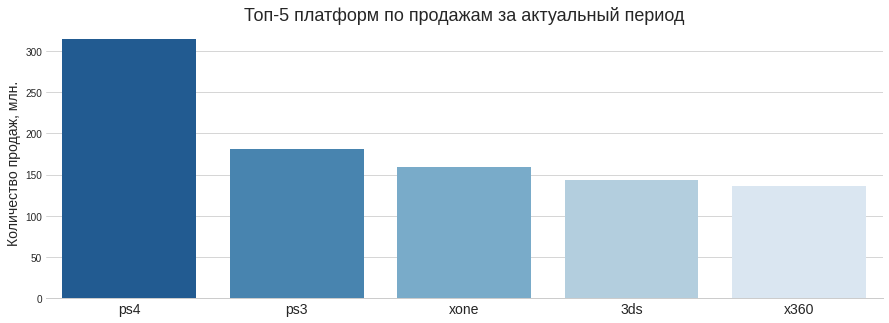

In [32]:
# создаём таблицу по продам популярных платформ за актуальный период
top_platform_slice = (
    slice
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
# добавляем столбец с долей продаж
top_platform_slice = share(top_platform_slice).head()
# выводим данные
display(top_platform_slice)

# строим график
plt.figure(figsize=(15,5))

ax = sns.barplot(
    data=top_platform_slice,
    x='platform',
    y='total_sales',
    palette=palette
    )
# оформляем
plt.title('Топ-5 платформ по продажам за актуальный период', size=18)
plt.xlabel('')
plt.ylabel('Количество продаж, млн.', size=14)
plt.xticks(size=14)
#ax.bar_label(ax.containers[0], labels=round(top_platform_slice['total_sales'], 2), size=13)
sns.despine(left=True)
plt.show()

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


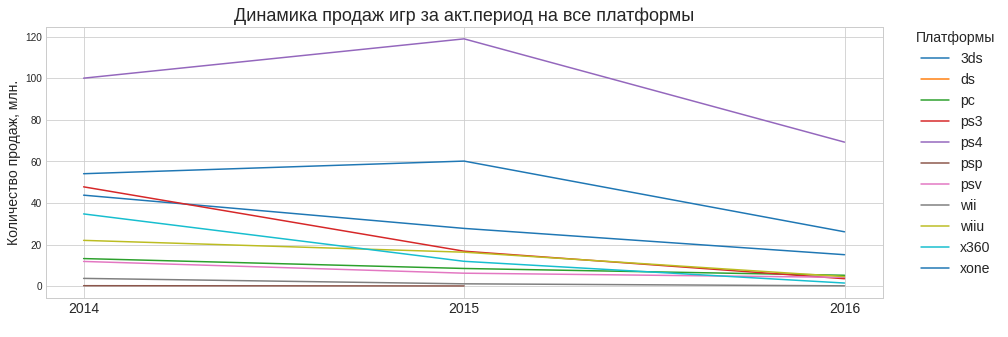

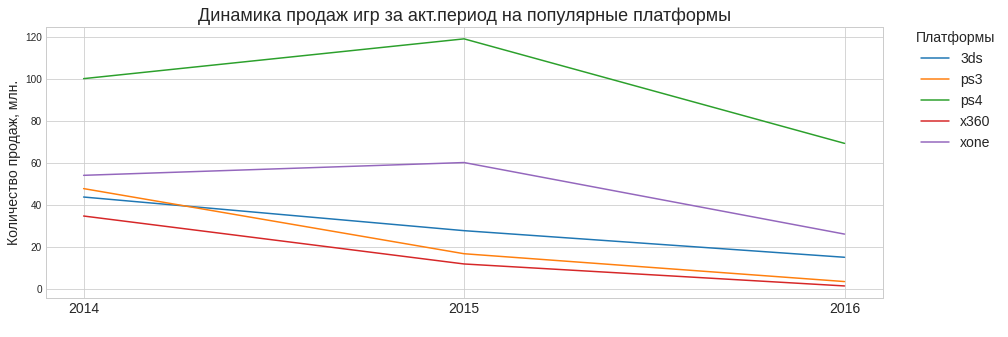

In [33]:
# создаём список популярных платформ за актуальный период
top_platform_slice_list = top_platform_slice['platform']

# создаём сводную таблицу продаж
sales_slice = (
    slice
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
        )[1:]
    )
# создаём сводную таблицу продаж по популярным платформам
top_sales_slice = (
    slice
    .query('platform in @top_platform_slice_list')
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
        )[1:]
    )
# выводим таблицу
display(sales_slice)

# определяем параметры
title = ['Динамика продаж игр за акт.период на все платформы', 'Динамика продаж игр за акт.период на популярные платформы']
df = [sales_slice, top_sales_slice]

# цикл строит графики по переменным
for i in range(len(df)):
    df[i].plot(figsize=(15,5))
    plt.title(title[i], size=18)
    plt.xlabel(' ')
    x_ticks = top_sales_slice.index
    x_labels = top_sales_slice.index
    plt.xticks(ticks=x_ticks, labels=x_labels, size=14)
    plt.ylabel('Количество продаж, млн.', size=14)
    plt.legend(title= 'Платформы', title_fontsize = 14, prop = {'size' : 14}, bbox_to_anchor= (1.15, 1.03))
    plt.show()

За последние десять лет видеоигры были выпущены на 11 разных платформах. За данный период видеоигр уже прекращали продаваться на некоторые платформы, в то время как другие начали выходить уже на новые консоли. Продажи игр на этих платформах распределяются следующим образом:
- Sony PlayStation 4
- Sony PlayStation 3
- Microsoft Xbox One
- Nintendo 3DS
- Microsoft Xbox 360

По данным графика мы видим, что смена поколений произошла до актуального периода, и на данный момент срез данных захватил пик продаж уже актуальных платформ PS4 и Xbox One. Игры на предыдущие поколений консолей свелось к минимуму, кроме Nintendo 3DS, на которой игры продаются в небольшом количестве, но спад продаж за 4 года был небольшим и плавный.

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.

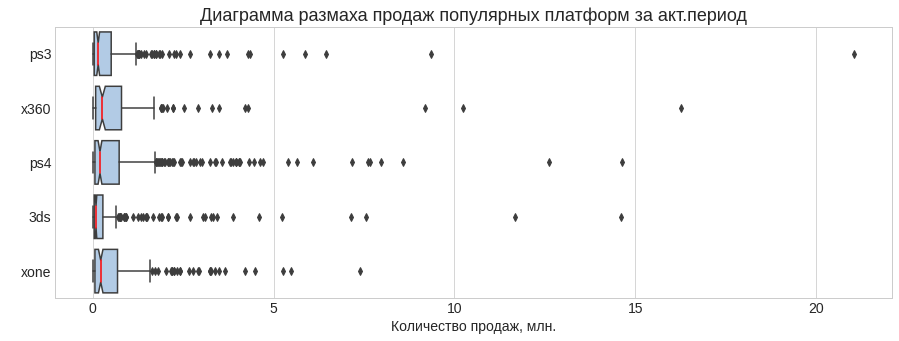

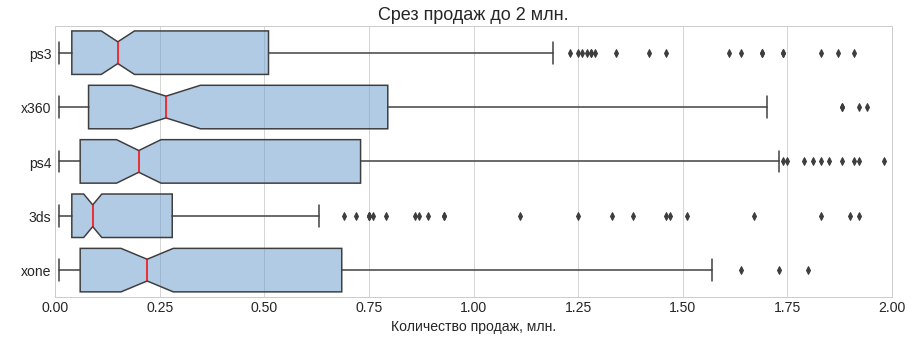

In [34]:
# строим график
plt.figure(figsize=(15,5))
sns.boxplot(
    x='total_sales',
    y='platform',
    data=slice.query('platform in @top_platform_slice_list'),
    boxprops={"facecolor": (.4, .6, .8, .5)},
    notch=True,
    medianprops={"color": "red"}
    )
plt.title("Диаграмма размаха продаж популярных платформ за акт.период", size=18)
plt.xlabel('Количество продаж, млн.', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel(' ')

# изменяем масштаб
plt.figure(figsize=(15, 5))
sns.boxplot(
    x='total_sales',
    y='platform',
    data=slice.query('platform in @top_platform_slice_list'),
    boxprops={"facecolor": (.4, .6, .8, .5)},
    notch=True,
    medianprops={"color": "red"}
    )
# оформляем
plt.xlim(0, 2)
plt.title("Срез продаж до 2 млн.", size=18)
plt.ylabel(' ')
plt.yticks(size=14)
plt.xlabel('Количество продаж, млн.', size=14)
plt.xticks(size=14)
plt.show()

На графике размаха продаж игр мы видим большое количество сильных выбросов, которые представляют собой блокбастеры, т. е. игры, продающиеся в разы или десятки раз больше, чем обычные игры на той или иной платформе. Чтобы сравнить продажи по платформам, мы сделаем срез данных, ограничившись продажами до 2 миллионов копий.

Основываясь на диаграммах размаха, можно сделать несколько выводов о продажах игр:

- В сравнении с PlayStation 3, игры на PlayStation 4 чаще приносили больше денег, хотя на PlayStation 3 тоже выпускали крупные блокбастеры;
- В сравнении с Xbox 360 игры на Xbox One приносили меньше прибыли и имели меньшее количество блокбастеров;
- Игры на Nintendo 3DS менее прибыльны, но имеют примерно такое же количество блокбастеров, как на старших и более успешных платформах.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Посчитаем корреляцию между отзывами и продажами. Для анализа выберем консоль самую популярную консоль за актуальный период - PS4.

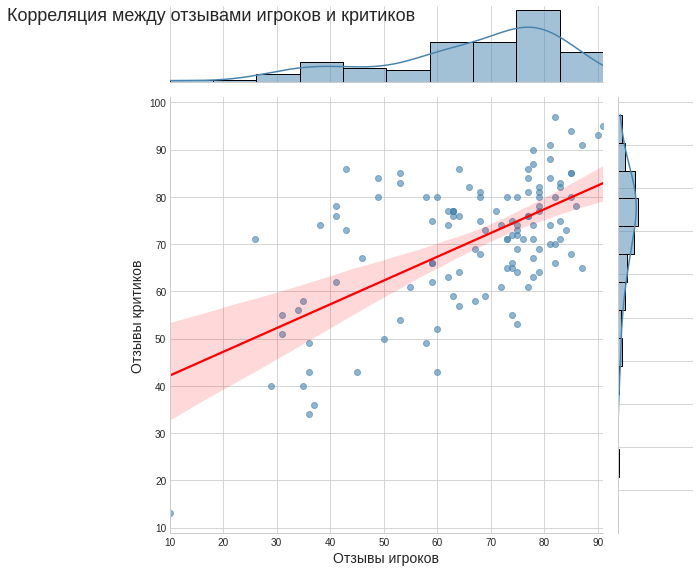

,columns,critic_score
1,user_score,0.90


In [35]:
# находим значение корреляции
score_corr = (
    slice
    .query('platform == "ps4"')[['critic_score','user_score']]
    .corr()['critic_score']
    .reset_index()[1:]
)
# оформляем
score_corr.columns = ['columns', 'critic_score']

# автоматически записываем масштаб осей
ticks = []
for tick in range(0,110,10):
    ticks.append(tick)
# строим график
score_jp = sns.jointplot(
    data=slice.query('platform == "ps3" and user_score > 0 and critic_score > 0'),
    x='user_score',
    y='critic_score',
    kind='reg',
    height=8,
    color=color,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'},
    )
# оформляем
score_jp.fig.suptitle("Корреляция между отзывами игроков и критиков", fontsize=18, horizontalalignment='right')
score_jp.set_axis_labels(xlabel="Отзывы игроков", ylabel="Отзывы критиков", fontsize=14)
plt.yticks(ticks=ticks, labels=ticks)
plt.xticks(ticks=ticks, labels=ticks)
# выводим данные
plt.show()
display(score_corr)

Оценки критиков и игроков имеют остаточно **сильную корреляцию** между собой и в основном зависят друг от друга.  Однако на графике можно заметить, что критики, как правило, более благосклонны к игровым проектам и дают им более высокие оценки по сравнению с игроками.

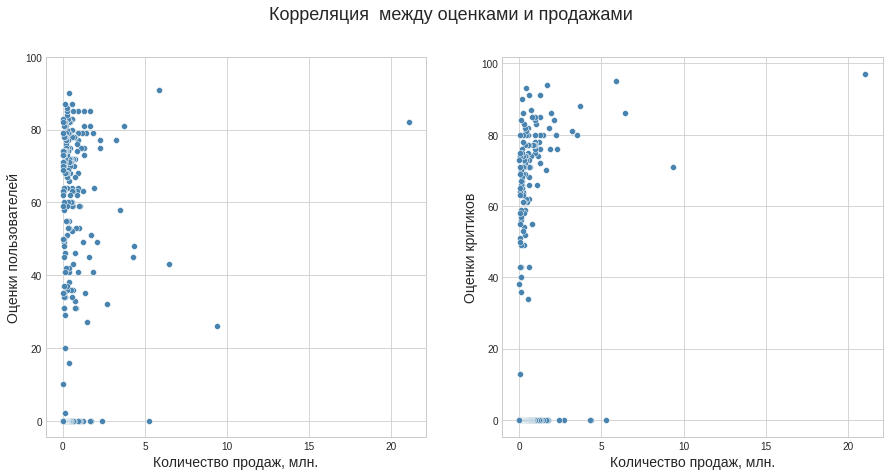

,columns,corr_with_total_sales
1,critic_score,0.23
2,user_score,0.11


In [36]:
# находим значение корреляции
score_sales_corr = (
    slice
    .query('platform == "ps4"')[['total_sales', 'critic_score', 'user_score']]
    .corr()['total_sales']
    .reset_index()[1:]
)
# оформляем
score_sales_corr.columns = ['columns', 'corr_with_total_sales']

# определяем параметры
scores = ['user_score', 'critic_score'] # переменные графиков
ylabels = ['Оценки пользователей', 'Оценки критиков'] # оглавление оси у
ticks = [] # масштаб оси у

# автоматически записываем масштаб оси у
for tick in range(0,120,20):
    ticks.append(tick)

# цикл строит графики по переменным
plt.figure(figsize=(15,7))
plt.suptitle("Корреляция  между оценками и продажами", size=18)
for i in range(len(scores)):
    plt.subplot(1,2,i+1)
    (
      sns.scatterplot(
          data=slice.query('platform == "ps3"'),
          x='total_sales',
          y=scores[i],
          color=color
          )
      )
    # оформляем
    plt.ylabel(ylabels[i], size=14)
    plt.yticks(ticks=ticks, labels=ticks)
    plt.xlabel('Количество продаж, млн.', size=14)
# выводим данные
plt.show()
display(score_sales_corr)

Согласно графику рассеивания и расчету корреляции, между продажами игр и отзывами существует **слабая корреляция**, но влияние отзывов критиков на продажи немного выше, чем влияние отзывов игроков.

По похожему прицепу рассмотрим и другие платформы.

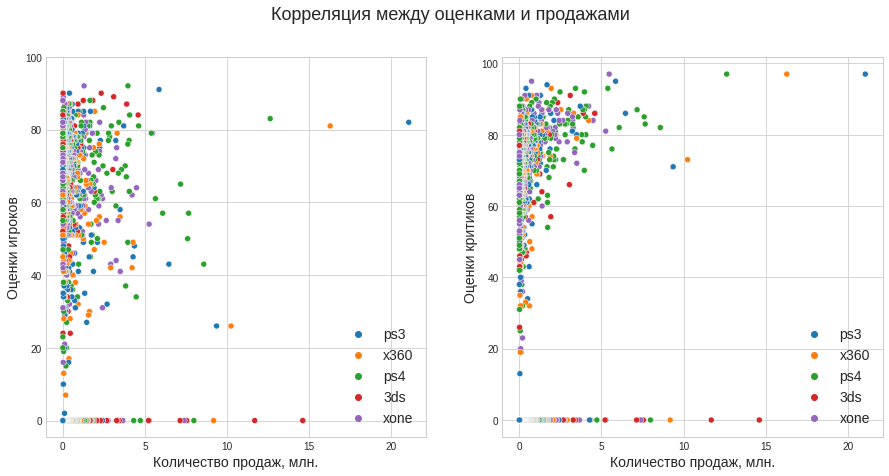


platform: ps3



,critic_score,user_score
total_sales,0.28,0.20



platform: x360



,critic_score,user_score
total_sales,0.25,0.07



platform: ps4



,critic_score,user_score
total_sales,0.23,0.11



platform: 3ds



,critic_score,user_score
total_sales,0.06,0.05



platform: xone



,critic_score,user_score
total_sales,0.27,0.12


In [37]:
# создаём срез данных
corr_platform = (
    slice
    .query('platform in @top_platform_slice_list')[['platform', 'critic_score', 'user_score', 'total_sales']]
)
# определяем параметры
scores = ['user_score', 'critic_score'] # переменные графиков
ylabels = ['Оценки игроков', 'Оценки критиков'] # оглавление оси у
ticks = [] # масштаб оси у

# автоматически записываем масштаб оси у
for tick in range(0,120,20):
    ticks.append(tick)

# цикл повторяет действия для переменных графиков
plt.figure(figsize=(15,7))
plt.suptitle("Корреляция между оценками и продажами", size=18)
for i in range(len(scores)):
    plt.subplot(1,2,i+1)
    (
      sns.scatterplot(
          data=corr_platform,
          x='total_sales',
          y=scores[i],
          hue='platform'
          )
      )
    # оформление
    plt.ylabel(ylabels[i], size=14)
    plt.yticks(ticks=ticks, labels=ticks)
    plt.xlabel('Количество продаж, млн.', size=14)
    plt.legend(loc='lower right', prop={'size': 14})
plt.show()

# цикл строит графики по переменным
for p in corr_platform['platform'].unique():
    # название платформы
    print(
      font.BOLD,
      f"platform: {p}",
      font.END,
      sep='\n'
      )
    # корреляция
    display(
      corr_platform
      .query(f"platform == {[p]}")
      .corr()[['critic_score','user_score']][2:]
  )

Анализируя взаимосвязь между оценками и продажами игр на популярных платформах последние пять лет, можно сказать, что эта взаимосвязь не является сильной. На платформе Nintendo 3DS взаимосвязь с оценками является самой слабой.

Рассмотрим общее распределение игр по жанрам.

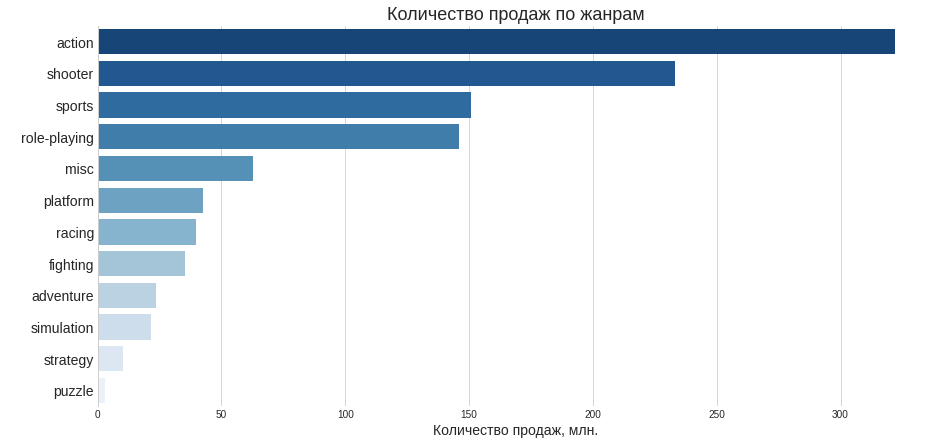

In [38]:
# создаём таблицу распределения
genre_sales = (
    slice
    .groupby('genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
# строим график
plt.figure(figsize=(15,7))
sns.barplot(
    data=genre_sales,
    x='total_sales',
    y='genre',
    palette=palette
    )
# оформляем
plt.title('Количество продаж по жанрам', size=18)
plt.xlabel('Количество продаж, млн.', size=14)
plt.ylabel(' ')
plt.yticks(size=14)
sns.despine(bottom=True)
plt.show()

Наиболее **прибыльными жанрами** видеоигр являются **экшены**, за которыми следуют **шутеры, спортивные и ролевые игры**. Головоломки и стратегии, напротив, приносят наименьший доход.
Популярность активных жанров, вероятно, связана с простотой их восприятия и управления, а также с тем, что они не требуют большого внимания, сложных решений или длительных сессий, как интеллектуальные игры, такие как головоломки и стратегии.

### Портрет игроков

Рассмотрим популярность платформ, жанров, а также рейтинг игр, которые были наиболее продаваемыми в разных регионах мира.

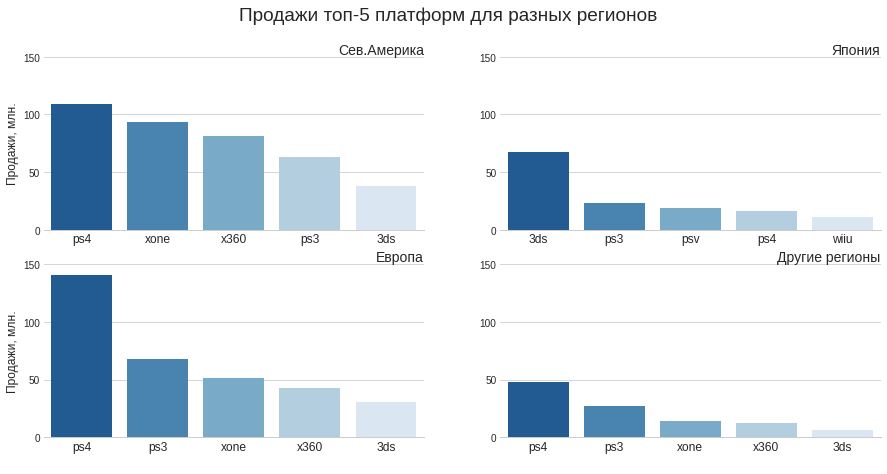

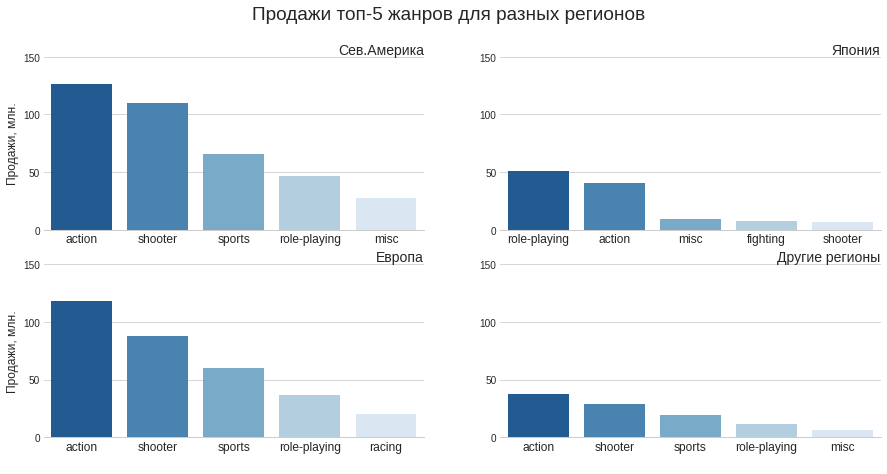

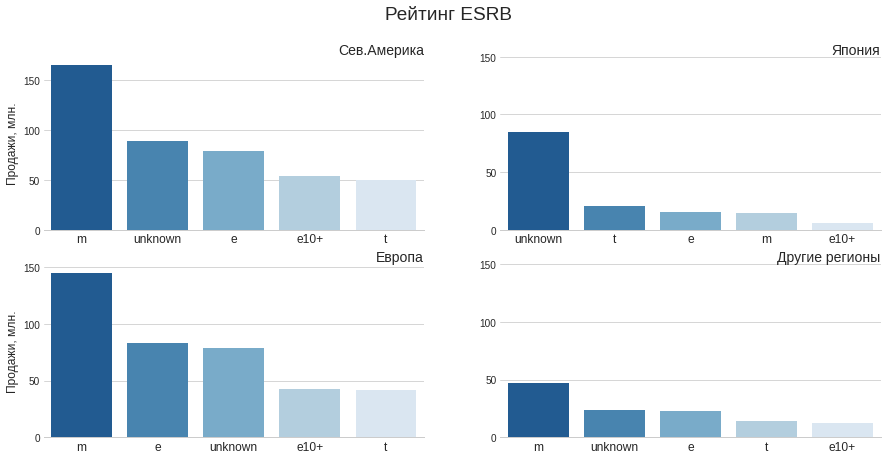

In [39]:
# определим параметры
features = ['platform', 'genre', 'rating'] # главные переменные графиков (блоки)
columns = ['na_sales', 'jp_sales', 'eu_sales', 'other_sales'] # разбивка по регионам
subtitles = ['Продажи топ-5 платформ для разных регионов', 'Продажи топ-5 жанров для разных регионов', 'Рейтинг ESRB']#оглавления
titles = ['Сев.Америка', 'Япония', 'Европа', 'Другие регионы'] # оглавления графиков
ticks = [] # масштаб оси у

# автоматически записываем масштаб оси у
for tick in range(0,200,50):
    ticks.append(tick)
# создаём  блоки графиков оп искомым величинам
for f in range(len(features)):
    plt.figure(figsize=(15,7))
    plt.suptitle(subtitles[f], size=19)
  # создаём графики внутри блоков для каждого региона отдельно
    for i in range(len(columns)):
        plt.subplot(2,2,i+1)
        sns.barplot(
            data=(
                slice
                .query(f"{columns[i]} > 0") # убираем пропуски # and {features[f]} != 'unknown'
                .groupby(features[f])[columns[i]]
                .sum()
                .reset_index()
                .sort_values(by=columns[i], ascending=False)
                .head()
                ),
            x=features[f],
            y=columns[i],
            palette=palette
            )
        # оформляем
        plt.title(titles[i], size=14, loc='right', pad=-5)
        plt.xlabel(' ')
        plt.ylabel(' ')
        plt.yticks(ticks=ticks, labels=ticks)
        plt.xticks(size=12)
        sns.despine(left=True)
        if i == 0 or i == 2:
            plt.ylabel('Продажи, млн.', size=12)
        else:
            plt.ylabel(' ')
    plt.show()

Анализируя популярные **платформы** в разных регионах, можно сделать следующие выводы:
- **С. Америка - самый прибыльный рынок**. Видеоигры продаются больше, чем в остальном мире. На это повлияло количество и платёжеспособность потребителей в данном регионе, и тот факт, что США один из первых регионов рынка видеоигровой индустрии;
- Во всех регионах, кроме Японии, больше всего игр продаются на PS4. В Северной Америке PS4 сильно конкурирует с актуальной Xbox One, а в Европе и в других регионах подавляющее большинство игр продаются на PS4 и PS3.
- Японский регион - самый уникальный. Актуальные стационарные консоли не так популярны, как портативные. Большинство продаж пришлось на игры для Nintendo 3DS. За актуальный период продажи PS4, в отличии от остальных регионов, не успели превысить продажи на PS3. А продажи консолей Microsoft не вошли в топ-5 платформ в данном регионе.

Аналогично проанализируем **жанры**:
- Во всех регионах, кроме Японии **больше всего продаются экшен-игры, шутеры и спортивные**. 
- В Японии на первое место по продажам с большим преимуществом выходят ролевые игры. Популярность ролевых игры в Японии - скорее всего культурный феномен. Также больше популярны музыкальные игры и файтинги, чем шутеры и спортивные игры;
- В Европе больше любят гоночные игры, чем музыкальные. 

Далее выводы по анализу **рейтинга** видеоигр:
- Помимо уже известных рейтингов для игры, в топы продаж в каждом из регионов попали игры с неизвестным рейтингом. Возможные причины данного факта описаны ниже;
- Во всех регионах, кроме Японии и Европе **больше всего продаются игры с рейтингом M - "Для взрослых"**, и игры без рейтинга;
- В Японии игры с рейтингами E - "Для всех" и T - "Для подростков" продаются заметно больше, чем игры «Для взрослых», но больше всего продаются игры с неизвестным рейтингом. 

Организация ESRB, которая выставляет возрастные рейтинги для игры в Северной Америке, не единственная в своём роде. В остальные регионах существую свои подобные организации, например PEGI и USK в Европе, CERO в Японии, РСВР в России и так далее. Игры с неизвестными рейтинги в японском, европейском и других регионах, могут быть вызваны наличием игр от местных издателей, которые в первую очередь присваивают локальную оценку. Так же причиной может быть отсутствие выхода игр на североамериканский рынок, следовательно оценки от ESRB проставлены не будут. Отсутствие рейтинга ESRB в самом североамериканском регионе может быть вызвано, продажей игр из-за рубежа, и игр, которые официально не издавались в странах данного региона, и так далее. Для возможность продавать игры в Северной Америке наличие рейтинга от ESRB юридически необязательно.

---

В ходе анализа динамики продаж видеоигр с 1985 по 2016 год было выявлено, что пик продаж пришелся на с 2008–2009 гг. С 2009 года продажи начали снижаться до окончания наблюдений. Для анализа успешности современных видеоигр стоит рассматривать непосредственно современные игры, поэтому мы определили последние 4 года как актуальный период.

Анализируя данные продаж за актуальные период, мы взяли 5 самых популярных платформ по продажам из 11, и сделали следящие выводы:
- Во время актуального периода, мы наблюдаем пик продаж игр на актуальные консоли;
- Игры, выходившие на прошлое и актуальное поколения консолей PlayStation и Xbox, достигали примерно одинаковых продаж. Игры на Nintendo 3DS собирают в разы меньшую прибыль, но для данной консоли не редкость очень успешные игры-блокбастеры;
- Оценки критиков и игроков зависят друг от друга, но в целом, слабо влияют на продажи игр. 

Рассматривая предпочтения разных регионов, мы сделали следующие выводы:
- Северная Америка – самый крупный рынок видеоигровой индустрии;
- PS4 - самая популярная консоль во всех регионах, кроме Японии;
- Япония – самый уникальный регион. Там за это время PS4 не успела достичь продаж предшественницы. Портативные консоли более популярны, чем стационарные. А консоли от Microsoft не вошли в топ продаж;
- Самую большую прибыль приносят игры в активным жанрах: экшены, шутеры и спортивные игры. Менее популярные интеллектуальные жанры: головоломки, стратегии и приключения. Только в Японии на первое место по продажам с большим преимуществом выходят ролевые игры;
-  В Японии в равной степени больше всего популярные игры с неизвестным рейтингом и с рейтингами «Для всех» и «Для подростков». Во остальных регионах больше всего продаются игры с рейтингом «Для взрослых», и игры с неизвестным рейтингом.

---

## Статистический тест


Определим и проверим следующие 2 гипотеза.

**Первая гипотеза:** _"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"._

**Вторая гипотеза:** _"Средние пользовательские рейтинги жанров экшен и спортивные разные"._

Проверим их вместе, но для начала сформулируем нулевые гипотезы:
>**Нулевая гипотеза 1**: _Средние пользовательские рейтинги Xbox One и ПК **одинаковы**._               
>Альтернативная гипотеза 1: _Средние пользовательские рейтинги Xbox One и ПК **отличаются**_.

>**Нулевая гипотеза 2**: _Средние пользовательские рейтинги экшен и спортивных игр **равны**._           
>Альтернативная гипотеза 2: _Средние пользовательские рейтинги жанров экшен и спортивные **разные**_.

In [40]:
# формируем выборки для проверки ПЕРВОЙ гипотеза
xone = slice.query('platform == "xone" and user_score > 0')['user_score']
pc = slice.query('platform == "pc" and user_score > 0')['user_score']

# формируем выборки для проверки ВТОРОЙ гипотеза
action = slice.query('genre == "action" and user_score > 0')['user_score']
sports = slice.query('genre == "sports" and user_score > 0')['user_score']

# выводим результаты
print(
    'Размеры первой группы выборок:',
    f'xbox one - {xone.count()}',
    f'pc - {pc.count()}',
    ' ',
    'Размеры второй группы выборок:',
    f'action - {action.count()}',
    f'sports - {sports.count()}',
    sep='\n'
)

Размеры первой группы выборок:
xbox one - 182
pc - 155
 
Размеры второй группы выборок:
action - 389
sports - 160


Мы сформировали две выборки для проверки двух разных теорий. Так как **размеры выборок не равны** между собой, мы можем предположить, что их **дисперсии** также **могут отличаться**, поэтому необходимо скорректировать статистический тест. Прежде чем проводить t-тест для сравнения средних, мы должны проверить распределение выборок на нормальность.



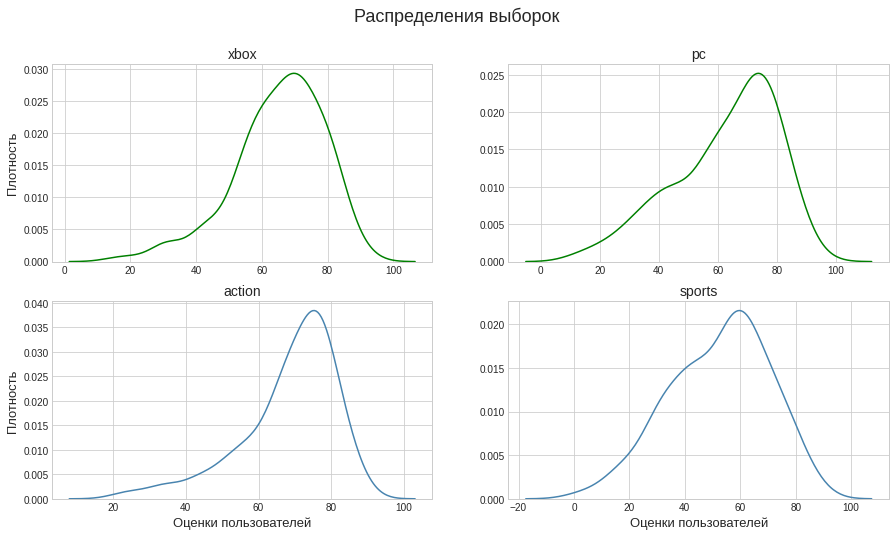

In [41]:
# с помощью цикла выводим два графика плотности, которые показывают распределения выборок
samples = [xone, pc, action, sports] # выборки
sample_titles = ['xbox', 'pc', 'action', 'sports'] # оглавления выборок

# оформляем график
plt.figure(figsize=(15, 8))
plt.suptitle('Распределения выборок', size=18)

# цикл выводит графики плотности выборок, которые показывают распределение значений
for i in range(len(samples)):
    plt.subplot(2,2,i+1)
  # логическое условие для разбивки по цвету
    if i >= 2:
        sns.kdeplot(data=samples[i], color=color)
        plt.xlabel('Оценки пользователей', size=13)
    else:
        sns.kdeplot(data=samples[i], color='green')
        plt.xlabel(' ')
    plt.title(sample_titles[i], size=14)
    if i == 0 or i == 2:
        plt.ylabel('Плотность', size=13)
    else:
        plt.ylabel(' ')
plt.show()

Графики показывают распределение выборок для двух тестов, которые разделены по цвету: зеленые – для первого теста и синие – для второго. Все выборки имеют **нормальное распределение** с левым смещением и **подходят для применения** статистических тестов.

In [42]:
# уровень статистической значимости
alpha = .05

# переменные для функции
param_1 = [xone, action] # переменные для первого параметра функции
param_2 = [pc, sports] # переменные для второго параметра функции
title = ['первого', 'второго'] # номеры тестов дял вывода результатов

# проводим два теста с помощью цикла
for i in range(len(param_1)):
    results = st.ttest_ind(param_1[i], param_2[i], equal_var=False)
    # `equal_var=False`, т.к. выборки разных размеров, дисперсия предположительно разная

  # выводим результаты
    print(
        f'Среднее выборок: {round(param_1[i].mean(),1)} и {round(param_2[i].mean(),1)}',
        f'p-значение {title[i]} теста: {results.pvalue}',
        sep='\n'        
    )

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу', ' ', sep='\n')
    else:
        print('Не получилось отвергнуть нулевую гипотезу', ' ', sep='\n')

Среднее выборок: 65.2 и 62.7
p-значение первого теста: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу
 
Среднее выборок: 68.4 и 52.4
p-значение второго теста: 1.446003970070494e-20
Отвергаем нулевую гипотезу
 


Результаты двух тестов показали, что p-значение первого теста слишком большое, чтобы его можно было отвергнуть даже по уровню ст. значимости в 5%, поэтому гипотеза _"Средние пользовательские рейтинги Xbox One и ПК одинаковы."_ **не отвергаем.**

p-значение второго теста практически равен нулю, поэтому альтернативаня гипотеза _"Средние пользовательские рейтинги экшн и спортивных игр разные."_ с большей вероятности имеет право на сущетвование.

Следовательно мы не можем потвердить различие между средних пользовательских рейтингом платформ Xbox One и PC, но можем предположить, что с большей вероятности средние пользовательские рейтинги экшен и спортивных игр разные.

---

## Общие выводы

Представленный датафрейм содержит 11 колонок на 16 715 строчек и включает в себя информацию о играх и их реализации, а также оценки игроков и критиков. После проведения предварительной обработки и корректировки данных, мы переименовали колонки, убрали пропущенные значения, привели типы данных к единому формату, удалили дублирующийся записи и добавили колонку, содержащую совокупные результаты по всем регионам, чтобы получить полную картину продаж. 

В ходе анализа **продаж видеоигр с 1985 по 2016 год** было выявлено, что пик продаж пришелся на с 2008–2009 гг. Однако в промежутке с 1985 по 2008 наблюдалось неравномерное развитие с периодическими спадами, с 2009 года продажи начали снижаться до окончания наблюдений. Для анализа успешности современных видеоигр стоит рассматривать непосредственно современные игры. Средний срок цикла поколений консолей составляет 9.6 лет, а их пик продаж чаще всего приходится на середину цикла, поэтому мы определили последние 4 года как актуальный период.

Анализируя данные **продаж за актуальные период**, мы взяли 5 самых популярных платформ по продажам из 11: Sony PlayStation 4, Microsoft Xbox One Sony PlayStation 3, Microsoft Xbox 360, , Nintendo 3DS, и сделали следящие выводы:
- Во время актуального периода, мы наблюдаем пик продаж игр на актуальные консоли;
- Игры, выходившие на прошлое и актуальное поколения консолей PlayStation и Xbox, достигали примерно одинаковых продаж. Игры на Nintendo 3DS собирают в разы меньшую прибыль, но для данной консоли не редкость очень успешные игры-блокбастеры;
- Оценки критиков и игроков зависят друг от друга, но в целом, слабо влияют на продажи игр. В наименьшей степени на игры, выходившие на Nintendo 3DS.

Рассматривая **предпочтения разных регионов**, мы сделали следующие выводы:
- Северная Америка – самый крупный рынок видеоигровой индустрии;
- PS4 - самая популярная консоль во всех регионах, кроме Японии;
- Япония – самый уникальный регион. Там за это время PS4 не успела достичь продаж предшественницы. Портативные консоли более популярны, чем стационарные. А консоли от Microsoft не вошли в топ продаж;
- Самую большую прибыль приносят игры в активным жанрах: экшены, шутеры и спортивные игры. Менее популярные интеллектуальные жанры: головоломки, стратегии и приключения. Только в Японии на первое место по продажам с большим преимуществом выходят ролевые игры;
-  В Японии в равной степени больше всего популярные игры с неизвестным рейтингом и с рейтингами «Для всех» и «Для подростков». Во остальных регионах больше всего продаются игры с рейтингом «Для взрослых», и игры с неизвестным рейтингом.

Далее мы проверили две **гипотезы**: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров экшен и спортивные разные". Результат статистических тестов показал, мы не можем потвердить различие между средних пользовательских рейтингом платформ Xbox One и PC, но можем предположить, что с большей вероятности средние пользовательские рейтинги экшен и спортивных игр разные.

Задачей данного анализа было выявить закономерности, которые определяют успешность игр, чтобы выбрать потенциально популярные продукты и разработать эффективные рекламные кампании. Мы выявили, что **популярными продуктами являются** игры в активных жанрах с рейтингом «Для взрослых» или «Для всех», выходящие актуальные платформы PlayStation обязательно в североамериканском и/или европейском регионе.